In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/x_values-1.npy" "/content/"
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/y_values-1.npy" "/content/"
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/test_x_values-1.npy" "/content/"
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/wineData-1.npy" "/content/"
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/wineLabels-1.npy" "/content/"
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/task3_5_labels.npy" "/content/"

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from bisect import bisect_left


3.1   Linear Regression

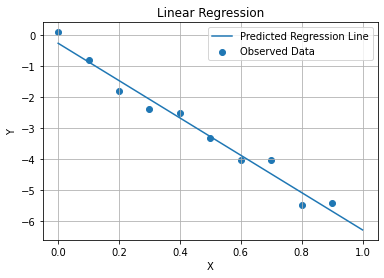

x = [[0.48]] 
y = [[-3.14442237]]


In [ ]:
x_values = np.load('x_values-1.npy')
y_values = np.load('y_values-1.npy')
x_test_values = np.load('test_x_values-1.npy')

# df = pd.DataFrame(x_values)
# print(df.describe)

# Scatter plot for training dataset
plt.figure()
plt.title(label = 'Linear Regression')
plt.xlabel(xlabel = 'X')
plt.ylabel(ylabel = 'Y')
plt.scatter(x_values, y_values, label = 'Observed Data')

# Fit data to the modal
reg = LinearRegression(fit_intercept = True).fit(x_values, y_values)

# Plot regression line using test dataset
y_predicted_values = reg.predict(x_test_values)
plt.plot(x_test_values, y_predicted_values, label = 'Predicted Regression Line')

plt.grid()
plt.legend()
plt.show()

# Calculate output using trained modal
x = [[0.48]]
y = reg.predict(x)
print(f'x = {x} \ny = {y}')



3.2 Principle Component Analysis


Shape of Dataset : (178, 13)
Shape of Labels : (178,)


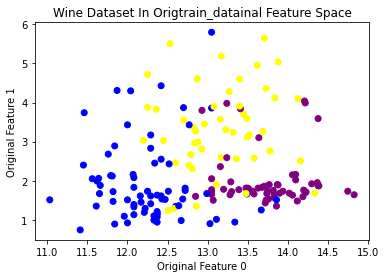

Shape of Original Training Dataset : (142, 13)
Shape of Original Testing Dataset : (36, 13)
Shape of Original Training Labels : (142,)
Shape of Original Testing Labels : (36,)


In [ ]:
wine_data = np.load('wineData-1.npy')
wine_labels = np.load('wineLabels-1.npy')

print(f'Shape of Dataset : {wine_data.shape}')
print(f'Shape of Labels : {wine_labels.shape}')

plt.figure()
plt.title(label='Wine Dataset In Origtrain_datainal Feature Space')
plt.xlabel(xlabel = 'Original Feature 0')
plt.ylabel(ylabel = 'Original Feature 1')
cmap = np.array(['purple', 'blue', 'yellow'])
plt.scatter(wine_data[:, 0],wine_data[:, 1], c = cmap[wine_labels])
plt.show()

train_data,test_data,train_labels,test_labels = train_test_split(wine_data, wine_labels, train_size=0.8) # 0.8 >> 80% for training
print(f'Shape of Original Training Dataset : {train_data.shape}')
print(f'Shape of Original Testing Dataset : {test_data.shape}')
print(f'Shape of Original Training Labels : {train_labels.shape}')
print(f'Shape of Original Testing Labels : {test_labels.shape}')



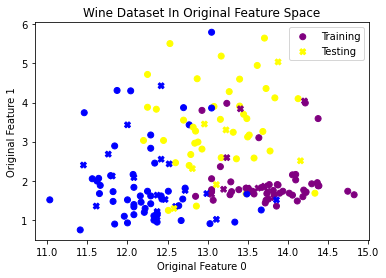

Shape of Reduced Training Dataset : (142, 2)
Shape of Reduced Testing Dataset : (36, 2)


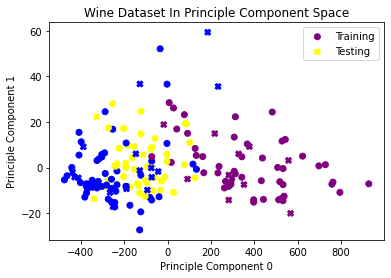

In [ ]:
plt.figure()
plt.title(label='Wine Dataset In Original Feature Space')
plt.xlabel(xlabel = 'Original Feature 0')
plt.ylabel(ylabel = 'Original Feature 1')
plt.scatter(train_data[:, 0],train_data[:, 1], c = cmap[train_labels], label = 'Training')
plt.scatter(test_data[:, 0],test_data[:, 1], c = cmap[test_labels], marker = 'X', label = 'Testing')
plt.legend()
plt.show()

pca = PCA(n_components = 2) # Keep only two principle components
pca.fit(X = train_data)
reduced_train_data = pca.transform(X = train_data)
reduced_test_data = pca.transform(X = test_data)
print(f'Shape of Reduced Training Dataset : {reduced_train_data.shape}')
print(f'Shape of Reduced Testing Dataset : {reduced_test_data.shape}')

plt.figure()
plt.title(label='Wine Dataset In Principle Component Space')
plt.xlabel(xlabel = 'Principle Component 0')
plt.ylabel(ylabel = 'Principle Component 1')
plt.scatter(reduced_train_data[:, 0],reduced_train_data[:, 1], c = cmap[train_labels], label = 'Training')
plt.scatter(reduced_test_data[:, 0],reduced_test_data[:, 1], c = cmap[test_labels], marker = 'X', label = 'Testing')
plt.legend()
plt.show()



Task 3.3 Linear Descriminant Analysis 

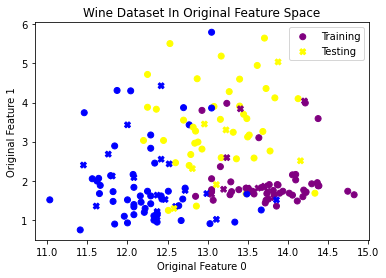

Shape of Reduced Training Dataset : (142, 2)
Shape of Reduced Testing Dataset : (36, 2)


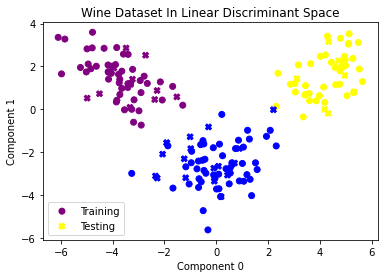

In [ ]:
plt.figure()
plt.title(label='Wine Dataset In Original Feature Space')
plt.xlabel(xlabel = 'Original Feature 0')
plt.ylabel(ylabel = 'Original Feature 1')
plt.scatter(train_data[:, 0],train_data[:, 1], c = cmap[train_labels], label = 'Training')
plt.scatter(test_data[:, 0],test_data[:, 1], c = cmap[test_labels], marker = 'X', label = 'Testing')
plt.legend()
plt.show()

lda = LinearDiscriminantAnalysis(n_components = 2) 
lda.fit(X = train_data, y = train_labels)
reduced_train_data = lda.transform(X = train_data)
reduced_test_data = lda.transform(X = test_data)
print(f'Shape of Reduced Training Dataset : {reduced_train_data.shape}')
print(f'Shape of Reduced Testing Dataset : {reduced_test_data.shape}')

plt.figure()
plt.title(label='Wine Dataset In Linear Discriminant Space')
plt.xlabel(xlabel = 'Component 0')
plt.ylabel(ylabel = 'Component 1')
plt.scatter(reduced_train_data[:, 0],reduced_train_data[:, 1], c = cmap[train_labels], label = 'Training')
plt.scatter(reduced_test_data[:, 0],reduced_test_data[:, 1], c = cmap[test_labels], marker = 'X', label = 'Testing')
plt.legend()
plt.show()

The main goal of the LDA is maximising inter-class mean distance and minimising variance within each class whereas PCA provides directions that describe the maximum variance in the whole dataset. Therefore, LDA operates better than PCA in classification and output label is used to maintain distance objective.

Task 3.4

(142, 13)


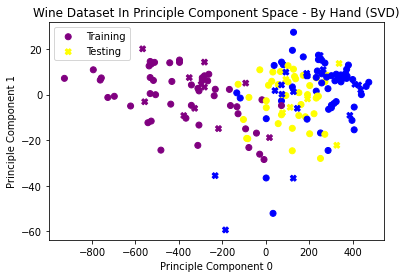

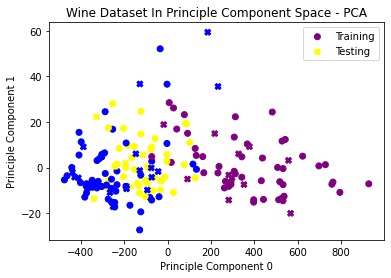

In [ ]:

mean_vector = np.mean(a = train_data, axis = 0) # (13,)
mean_centered_train_data = train_data - mean_vector # (142, 13)
print(mean_centered_train_data.shape) 

u, s, vh = np.linalg.svd(mean_centered_train_data, full_matrices=True)
"""
  shape(u) = M * M
  shape(s) = M * N
  shape(vh) = N* N 

  Rows(vh) = Eigen Vectors

  X = USV_T
  X.V_T = US = Projected Train Data On Principle Axis
"""
projection_matrix = vh[0:2,:]
projected_train_data = mean_centered_train_data @ projection_matrix.T
# projected_train_data = np.dot(mean_centered_train_data,projection_matrix.T)

mean_centered_test_data = test_data - mean_vector # (36, 13)
# projected_test_data = np.dot(mean_centered_test_data,projection_matrix.T)
projected_test_data = mean_centered_test_data @ projection_matrix.T

plt.figure()
plt.title(label='Wine Dataset In Principle Component Space - By Hand (SVD)')
plt.xlabel(xlabel = 'Principle Component 0')
plt.ylabel(ylabel = 'Principle Component 1')
plt.scatter(projected_train_data[:, 0],projected_train_data[:, 1], c = cmap[train_labels], label = 'Training')
plt.scatter(projected_test_data[:, 0],projected_test_data[:, 1], c = cmap[test_labels], marker = 'X', label = 'Testing')
plt.legend()
plt.show()

pca = PCA(n_components = 2) # Keep only two principle components
pca.fit(X = train_data)
reduced_train_data = pca.transform(X = train_data)
reduced_test_data = pca.transform(X = test_data)
plt.figure()
plt.title(label='Wine Dataset In Principle Component Space - PCA')
plt.xlabel(xlabel = 'Principle Component 0')
plt.ylabel(ylabel = 'Principle Component 1')
plt.scatter(reduced_train_data[:, 0],reduced_train_data[:, 1], c = cmap[train_labels], label = 'Training')
plt.scatter(reduced_test_data[:, 0],reduced_test_data[:, 1], c = cmap[test_labels], marker = 'X', label = 'Testing')
plt.legend()
plt.show()



$
X = US{V}^T \\ 
X\times {(V^T)}^T = US = Projection\ of\ data\ points\ on\ principle\ axis.\\
The\ result\ of\ [X\times {(V^T)}^T]\ is\ 142\times 2
$

The projection matrix is the matrix that contains selected(highest variant) priciple components after training the model(Each raw represents eigen vector). In the test stage, we should project our test dataset into the same priciple component(eigen) space to verify the model. Therefore, we do not need to calculate projection matrix again.

Each column in the data matrix represent defferent features and they may not be in the same scale. Therefore a linear transformation(normalization) is done into training dataset prior to execute PCA. In the test stage, the same linear transformation should be done for the testing dataset. If not it tests the model independent of the training data.



Task 3.5


X : (60000, 784)
Number of categories : 10
Eigen Values : (784,)
Eigen Vectors : (784, 784)
The minimum number of principle component to achieve 90% var : 87


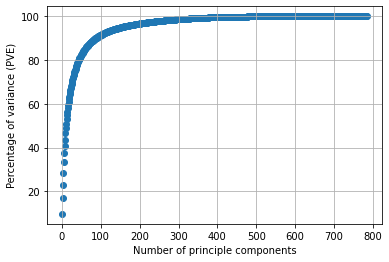

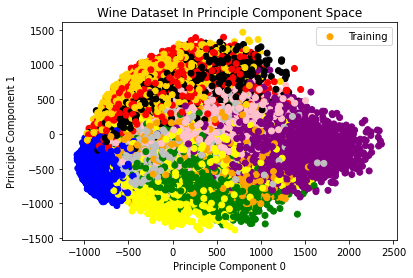

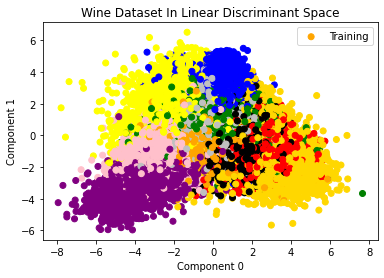

In [ ]:
data = np.load('task3_5_data.npy')
labels = np.load('task3_5_labels.npy')
print(f'X : {data.shape}')
print(f'Number of categories : {np.unique(labels).size}')

"""PCA"""
pca = PCA().fit(X = data)
eigen_values = pca.explained_variance_
eigen_vectors = pca.components_
print(f'Eigen Values : {eigen_values.shape}')
print(f'Eigen Vectors : {eigen_vectors.shape}')

eigen_values_normalized = eigen_values/sum(eigen_values)
eigen_values_cumsum = np.cumsum(eigen_values_normalized)
var_90_location = bisect_left(eigen_values_cumsum,0.9) + 1
print(f'The minimum number of principle component to achieve 90% var : {var_90_location}')
plt.figure()
plt.scatter(x = range(1, eigen_values.size+1), y = eigen_values_cumsum*100)
plt.xlabel(xlabel = 'Number of principle components')
plt.ylabel(ylabel = 'Percentage of variance (PVE)')
plt.grid()
plt.show()

reduced_train_data = pca.transform(X = data)
plt.figure()
plt.title(label='Wine Dataset In Principle Component Space')
plt.xlabel(xlabel = 'Principle Component 0')
plt.ylabel(ylabel = 'Principle Component 1')
cmap = np.array(['purple', 'blue', 'yellow', 'green', 'black', 'orange', 'pink','gold', 'silver', 'red'])
plt.scatter(reduced_train_data[:, 0],reduced_train_data[:, 1], c = cmap[labels], label = 'Training')
plt.legend()
plt.show()

"""LDA"""
lda = LinearDiscriminantAnalysis() 
lda.fit(X = data, y = labels)
reduced_train_data = lda.transform(X = data)

plt.figure()
plt.title(label='Wine Dataset In Linear Discriminant Space')
plt.xlabel(xlabel = 'Component 0')
plt.ylabel(ylabel = 'Component 1')
plt.scatter(reduced_train_data[:, 0],reduced_train_data[:, 1], c = cmap[labels], label = 'Training')
plt.legend()
plt.show()


Task 3.6

(1) 

The projection matrix(vh) is the matrix that contains selected priciple components after training the model(Each raw represents eigen vector). In the test stage, we should project our test dataset into the same priciple component(eigen) space to verify the model. Therefore, we do not need to calculate projection matrix again.

Each column in the data matrix represent defferent features and they may not be in the same scale. Therefore a linear transformation(normalization) is done into training dataset prior to execute PCA. In the test stage, the same linear transformation should be done for the testing dataset. If not it tests the model independent of the training data.

(2)
Most of the data is distributed(varied) along decision boundries and PCA provide those directions as priciple component which may lead to overlap multiple class data whereas LDA extract components which maximize inter-class distance.

(3)

Dimensionality reduction reduces the computation cost of matrix operation in the model by extracting most important features(implicit or explicit). For instance, most of the data samples have a lot of features and there are only few implicit(hidden) attributes contributes to classification.
